In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install statsmodels
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 21.0 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

In [4]:
df = pd.read_csv('Sdata.csv', delimiter=',', parse_dates=['Date_Of_Sale (mm-dd-yyyy)'], dayfirst=True)
df.rename(columns={'Date_Of_Sale (mm-dd-yyyy)': 'DATE', 'QUANTITYORDERED': 'Quantity ordered'}, inplace=True)
df['Quantity ordered'] = df['Quantity ordered'].astype(int)


<ipython-input-4-97a51feb727b>:1: UserWarning: Parsing dates in MM/DD/YYYY format when dayfirst=True was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df = pd.read_csv('Sdata.csv', delimiter=',', parse_dates=['Date_Of_Sale (mm-dd-yyyy)'], dayfirst=True)


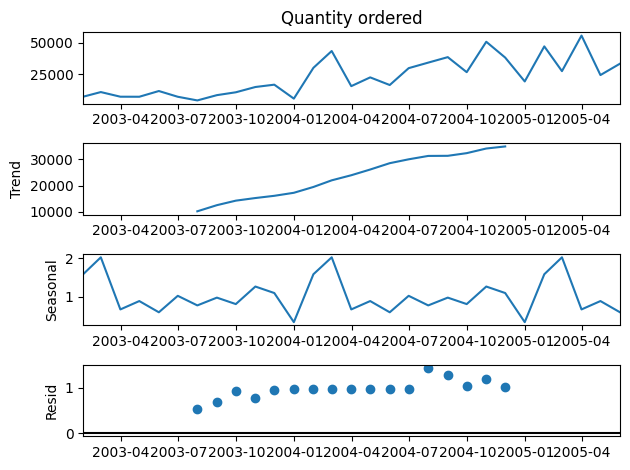

Manual ARIMA Predictions:
June 2005 → 34800 bolts total sale
July 2005 → 34410 bolts total sale
August 2005 → 34521 bolts total sale

ARIMA Parameters (Manual): (1, 1, 1)
ARIMA Parameters (AUTO): (1, 1, 1)
Manual calculated parameters match the auto calculated parameters.
                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   29
Model:             SARIMAX(1, 1, 1)x(0, 0, 1, 12)   Log Likelihood                -298.140
Date:                            Mon, 08 May 2023   AIC                            606.280
Time:                                    16:18:47   BIC                            612.941
Sample:                                01-31-2003   HQIC                           608.317
                                     - 05-31-2005                                         
Covariance Type:                              opg                                         

In [5]:
# Extract
time_series_data = df.groupby('DATE')['Quantity ordered'].sum().resample('M').sum()
time_series_data = time_series_data.loc[:'2005-05-31']

# Decompose
result = seasonal_decompose(time_series_data, model='multiplicative')
result.plot()
plt.show()

# Manual ARIMA
# Manually setting ARIMA parameters (p, d, q)
p = 1
d = 1
q = 1

model = ARIMA(time_series_data, order=(p, d, q))
model_fit = model.fit()

# Show the predictions
forecast = model_fit.forecast(steps=3)
print("Manual ARIMA Predictions:")
print("June 2005 →", int(forecast[0]), "total sale")
print("July 2005 →", int(forecast[1]), "total sale")
print("August 2005 →", int(forecast[2]), "total sale")

# AUTO_ARIMA
auto_arima_model = auto_arima(time_series_data, seasonal=True, m=12, suppress_warnings=True, stepwise=True)
auto_params = auto_arima_model.order

# Comparing
print("\nParameters (Manual):", (p, d, q))
print("Parameters (AUTO):", auto_params)

if (p, d, q) == auto_params:
    print("Manual calculated parameters match the auto calculated parameters.")
else:
    print("Manual calculated parameters doesn't match the auto calculated parameters")

print(auto_arima_model.summary())

1. Initially, I imported the order book data from CSV file and preprocessed it to ensure that the date column was in the correct format. Then i, I grouped the data by date and added up the 'QUANTITYORDERED' for each to obtain a meaningful time series of total sales. To determine the monthly total sales, I resampled the data using 'M' frequency and applied the sum function.

2. To analyze the time series, I used the seasonal_decompose function with a multiplicative model, which revealed an upward trend in sale. Although the seasonality was not very noticeable, there seemed to be some pattern, possibly with a 12-month period (annual seasonality). However, it is important to note that a longer data series would provide better insights into seasonality.

3. For forecasting, I manually calculated the ARIMA parameter by setting p = 1, d = 1 and q = 1. Then, I fitted the ARIMA model with theses parameters and predicted the total sales for June, July and August 2005. The predictions were 34800, 34410 and 34521 respectively.

4. Subsequently, I utilized the AUTO_ARIMA function to automatically calculated the ARIMA parameters, which were then compared to the manually set parameters. If the auto-calculated parameters match the manually set parameters, it indicates that our selection of parameters was reasonable. However, if they don't match, we can consider using the auto-calculated parameters for potentially better forecasting outcomes. 
